In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7ee18e4f5510>)

In [4]:
!pip install pandas --quiet

In [5]:
import pandas as pd

In [6]:
medical_df = pd.read_csv('medical.csv')

In [7]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
!pip install jovian --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [9]:
import jovian

In [10]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [11]:
!pip install plotly matplotlib seaborn --quiet

In [12]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
#age

In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
#bmi

In [ ]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
#distribution of charges

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [ ]:
#age and charges

In [ ]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
#bmi and charges

In [ ]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
px.violin(medical_df, x='children', y='charges')

In [ ]:
#corrolation

In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
medical_df.corr()

<ipython-input-29-cf93875bab50>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-30-32f619adbb17>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



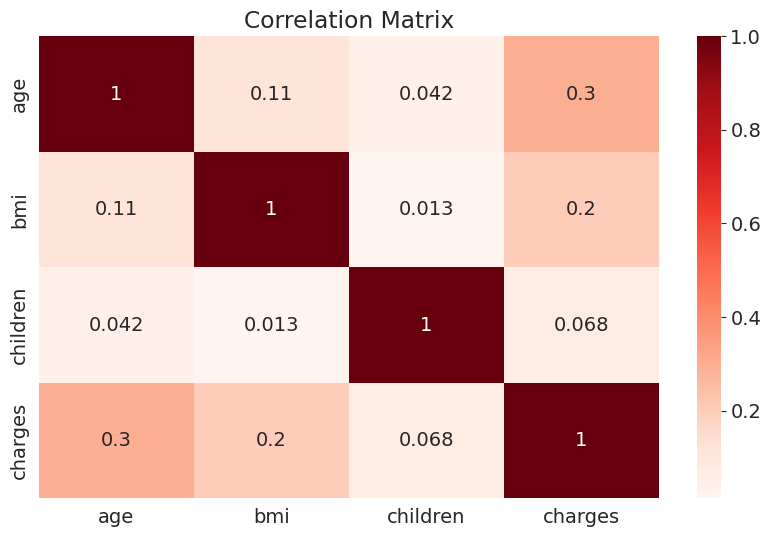

In [ ]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [ ]:
#Linear Regression using a single feature

In [ ]:
#we know that the smoker and age columns have the strongest corrlation with
#charges. Lets try estimate the value of charges using age for non smokers

In [13]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

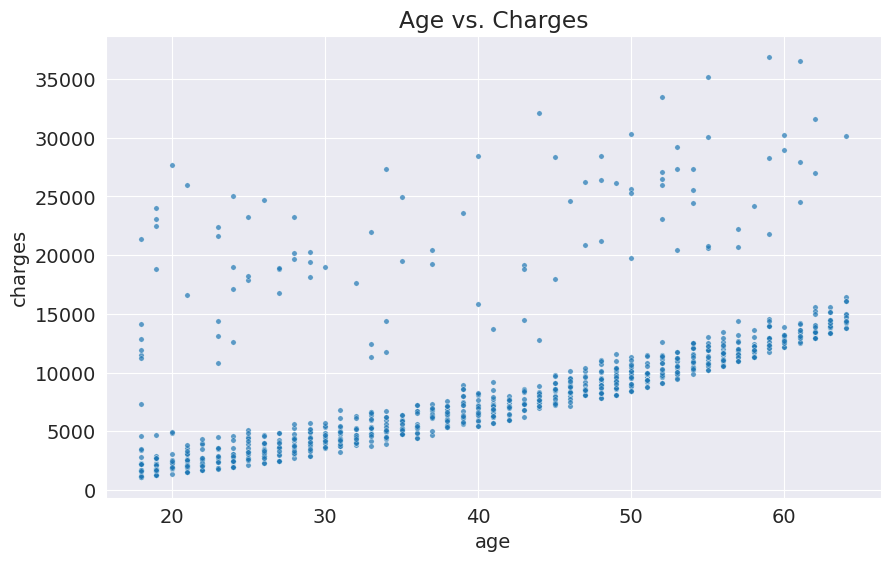

In [ ]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [19]:
def estimate_charges(age, w, b):
  return w * age + b

In [20]:
w = 50
b = 100

In [21]:
estimate_charges(40, w, b)

2100

In [22]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [23]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [ ]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

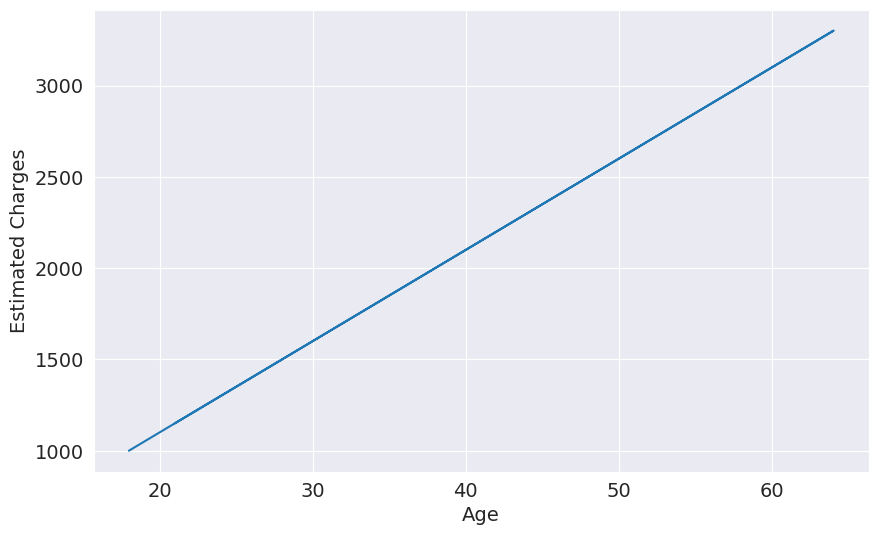

In [ ]:
#plot estimated charges
plt.plot(ages, estimated_charges);
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

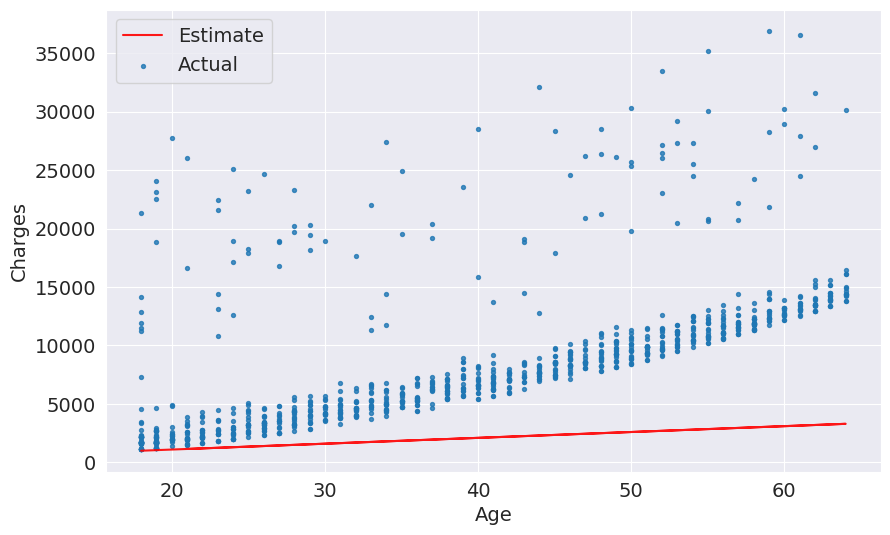

In [ ]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);

plt.scatter(ages, target, s=8, alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [16]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages, estimated_charges, 'r', alpha=0.9);
  plt.scatter(ages, target, s=8, alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual']);

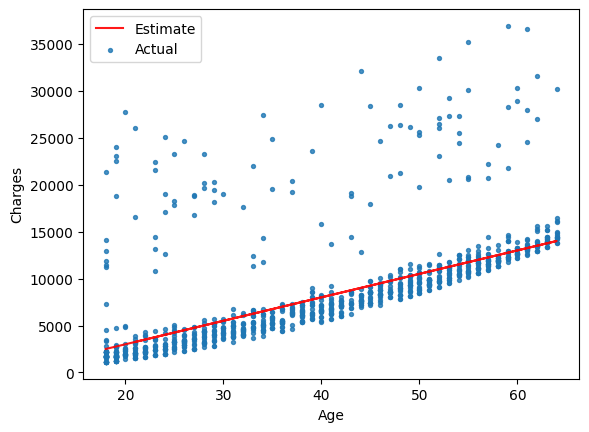

In [24]:
try_parameters(250, -2000)

In [ ]:
#loss/cost function
#compare our models prediction with the actual targets
#calculate the difference betweet the targets and predictions, the difference is called residual.
#square all elements of the difference matrix to remove negative values
#calculate the average of the elements in the resulting matrix
#take the sqaure root of the result
#the result is the root mean sqaured error RMSE

In [14]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [25]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [26]:
!pip install numpy --quiet

In [27]:
import numpy as np


In [28]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [29]:
w = 50
b = 100

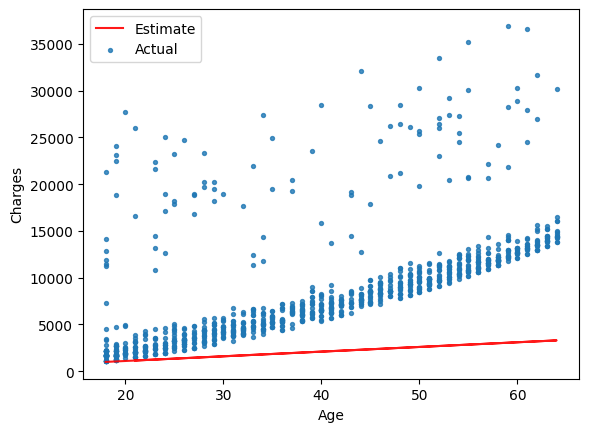

In [30]:
try_parameters(w, b)

In [ ]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
rmse(targets, predicted)

8461.949562575493

In [ ]:
#on average the prediction differs by $8461

In [ ]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  predictions = estimate_charges(ages, w, b)

  plt.plot(ages, predictions, 'r', alpha=0.9);
  plt.scatter(ages, target, s=8, alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges')
  plt.legend(['Prediction', 'Actual']);

  loss = rmse(target, predictions)
  print("RMSE Loss: ", loss)

RMSE Loss:  4991.993804156943


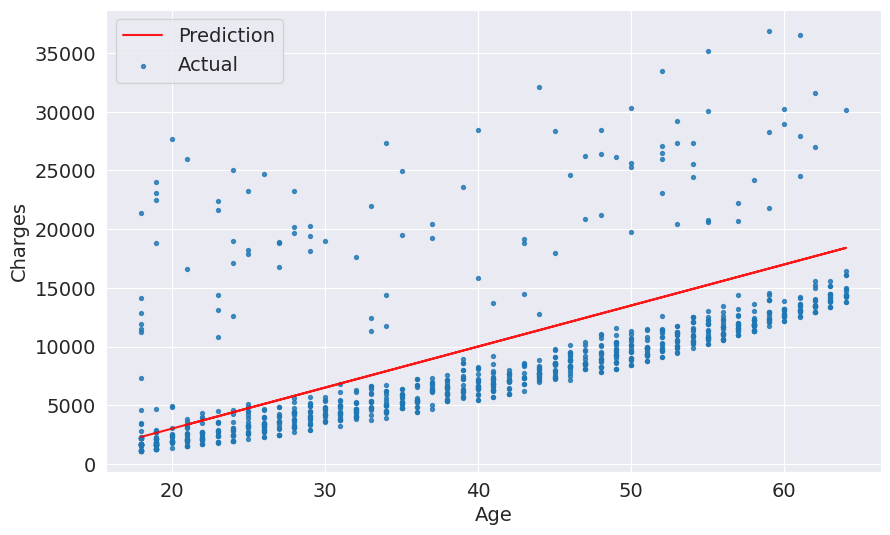

In [ ]:
try_parameters(350, -4000)

In [ ]:
#optimizer
#strategy to modify the weights w and b to reduce loss and improve fit
#ordinary least sqaures works well with small datasets
#stochastic gradient descent works well with large datasets

In [ ]:
#both these strategies have the same objective: to minimize loss
#ordinary least sqaures directly computes the best values for w and b using matrix operations
#gradient descent uses iterative approach, starting with random values of w and b and slowly improving using derivatives

In [ ]:
################

In [ ]:
#Linear Regression using Scikit-learn

In [31]:
!pip install scikit-learn --quiet

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [34]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [35]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape : ', inputs.shape)
print('targets.shape: ', targets.shape)

inputs.shape :  (1064, 1)
targets.shape:  (1064,)


In [36]:
model.fit(inputs, targets)

LinearRegression()

In [37]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [38]:
predictions = model.predict(inputs)

In [39]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [40]:
rmse(targets, predictions)

4662.505766636395

In [41]:
#w
model.coef_

array([267.24891283])

In [42]:
#b
model.intercept_

-2091.4205565650864

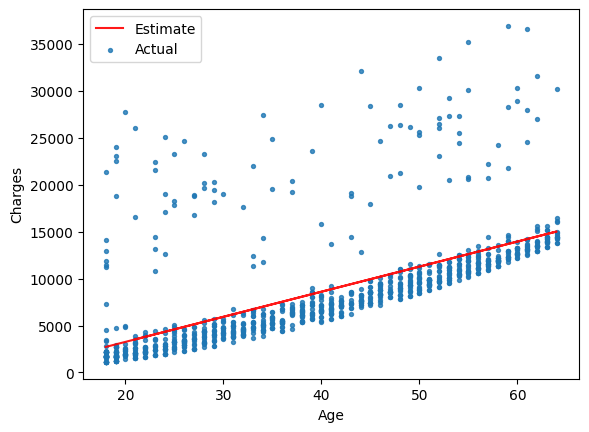

In [43]:
try_parameters(model.coef_, model.intercept_)

In [45]:
####Linear Regression with multiple features
#charges = w1 x age w2 x bmi + b

In [46]:
#create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

#create and train the model
model = LinearRegression().fit(inputs, targets)

#generate predictions
predictions = model.predict(inputs)

#compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ',  loss)

Loss:  4662.3128354612945


In [47]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [48]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [51]:
fig = px.scatter_3d(non_smoker_df, x='bmi', y='charges', title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [52]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

In [53]:
#add chidren
#charges = w1 x age + w2 x bmi + w3 x charges + b

In [54]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [55]:
fig = px.strip(non_smoker_df, x='children', y='charges', title="Children vs Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()


In [56]:
#create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

#create and train the model
model = LinearRegression().fit(inputs, targets)

#generate predictions
predictions = model.predict(inputs)

#compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4608.470405038247


In [57]:
#including smokers

#create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

#create and train the model
model = LinearRegression().fit(inputs, targets)

#generate predictions
predictions = model.predict(inputs)

#compute loss to evaluate model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  11355.317901125973


In [58]:
###################################
#Using Categorical features for machine learning
#1 if a catagorical column has just 2 categories its called a binary category, then we can replace their values with 0 and 1
#if a categorical column has more than 2 categories, we can perform one-hot encoding ie. create a new column for each category with 1s and 0s
#3 if the categories have a natural order(eg cold, neutral, warm, hot)then they can be converted to numbers (eg 1,2,3,4) preserving the order. These are called ordinals

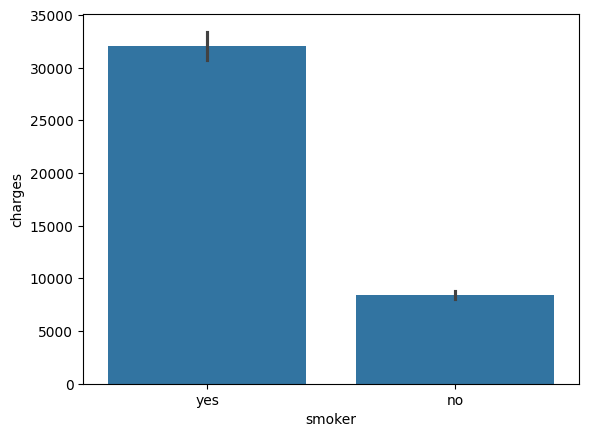

In [59]:
#Binary categories
sns.barplot(data=medical_df, x='smoker', y='charges');

In [60]:
smoker_codes = {'no' : 0, 'yes' : 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [61]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [62]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [63]:
#create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

#create and train the model
model = LinearRegression().fit(inputs, targets)

#generate predictions
predictions = model.predict(inputs)

#compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.439217188081


In [64]:
#add sex column in as well
#charges = w1 x age + w2 x bmi + w3 x charges + w4 x smoker + w5 x sex +b

<Axes: xlabel='sex', ylabel='charges'>

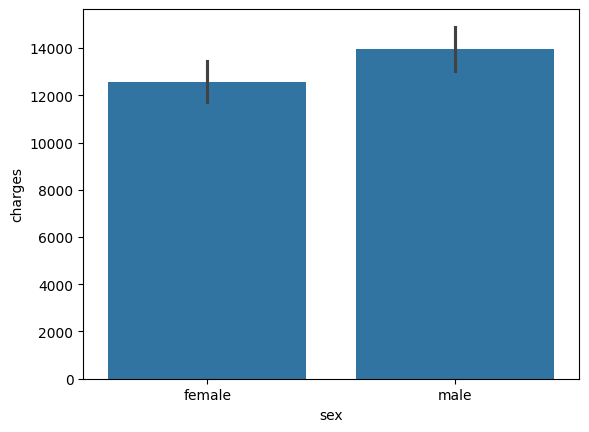

In [65]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [66]:
sex_codes = {'female': 0, 'male': 1}

In [67]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [70]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [68]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [71]:
#create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

#create and train the model
model = LinearRegression().fit(inputs, targets)

#generate predictions
predictions = model.predict(inputs)

#compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6056.100708754546


In [72]:
##Using one-hot encoding for the 'region' column

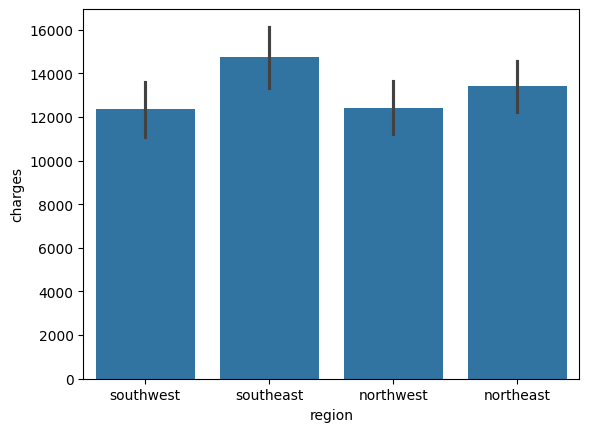

In [73]:
sns.barplot(data=medical_df, x='region', y='charges');


In [74]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [77]:
enc.transform([['northeast'],
               ['northwest']]).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [75]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [78]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [79]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [82]:
#now include region into our linear regression model


In [83]:
#create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

#create and train the model
model = LinearRegression().fit(inputs, targets)

#generate predictions
predictions = model.predict(inputs)

#compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  6041.6796511744515


In [84]:
#######################

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [87]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [88]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [89]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])